In [2]:
# Necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

# Set the aesthetic style of the plots
sns.set_style("whitegrid")


In [130]:
# Load the dataset
Airline_Data = pd.read_csv("Airline Passenger Satisfaction train.csv")
# Display the DataFrame
# Get Number of records and columns
print(Airline_Data.shape)
Airline_Data.head(10)

(103904, 25)


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
5,5,111157,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,...,1,3,4,4,4,4,1,0,0.0,neutral or dissatisfied
6,6,82113,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,...,2,3,3,4,3,5,2,9,23.0,neutral or dissatisfied
7,7,96462,Female,Loyal Customer,52,Business travel,Business,2035,4,3,...,5,5,5,5,4,5,4,4,0.0,satisfied
8,8,79485,Female,Loyal Customer,41,Business travel,Business,853,1,2,...,1,1,2,1,4,1,2,0,0.0,neutral or dissatisfied
9,9,65725,Male,disloyal Customer,20,Business travel,Eco,1061,3,3,...,2,2,3,4,4,3,2,0,0.0,neutral or dissatisfied


In [131]:
# Check size of the data set
Airline_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

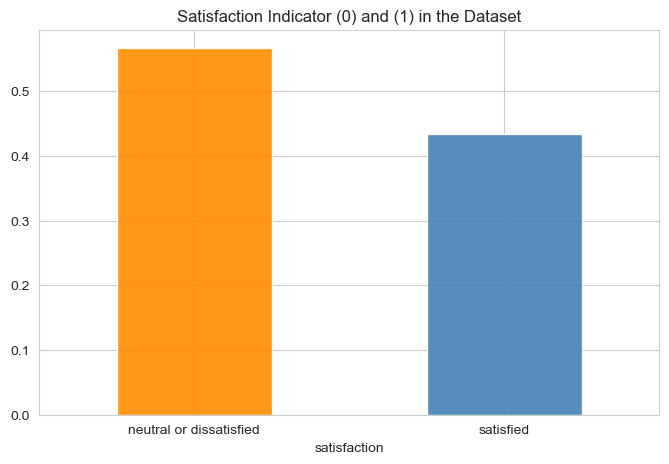

In [132]:
fig = plt.figure(figsize = (8,5))
Airline_Data.satisfaction.value_counts(normalize = True).plot(kind='bar', color= ['darkorange','steelblue'], alpha = 0.9, rot=0)
plt.title('Satisfaction Indicator (0) and (1) in the Dataset')
plt.savefig('Satisfaction Indicator (0) and (1) in the Dataset')
plt.show()

#The above plot reveals a about 55:45 split between neutral/dissatisfied 
    #and satisfied passengers. As a result, the data is relatively balanced 
    #and no extra resampling methods are required to be performed.

In [134]:
# 1. Basic statistics for numerical features
numerical_stats = Airline_Data.describe(include=[float, int])  
# Might need to adjust `include` based on the data types of your numerical columns.

# 2. Basic statistics for categorical features
categorical_stats = Airline_Data.describe(include=['object'])  

# 'object' is the general dtype for strings in pandas.
# Adjust the dtype as necessary based on your categorical data types.

# Display the statistics
print("Numerical Features Statistics:\n", numerical_stats)
print("\nCategorical Features Statistics:\n", categorical_stats)

Numerical Features Statistics:
           Unnamed: 0             id            Age  Flight Distance  \
count  103904.000000  103904.000000  103904.000000    103904.000000   
mean    51951.500000   64924.210502      39.379706      1189.448375   
std     29994.645522   37463.812252      15.114964       997.147281   
min         0.000000       1.000000       7.000000        31.000000   
25%     25975.750000   32533.750000      27.000000       414.000000   
50%     51951.500000   64856.500000      40.000000       843.000000   
75%     77927.250000   97368.250000      51.000000      1743.000000   
max    103903.000000  129880.000000      85.000000      4983.000000   

       Inflight wifi service  Departure/Arrival time convenient  \
count          103904.000000                      103904.000000   
mean                2.729683                           3.060296   
std                 1.327829                           1.525075   
min                 0.000000                           0.000

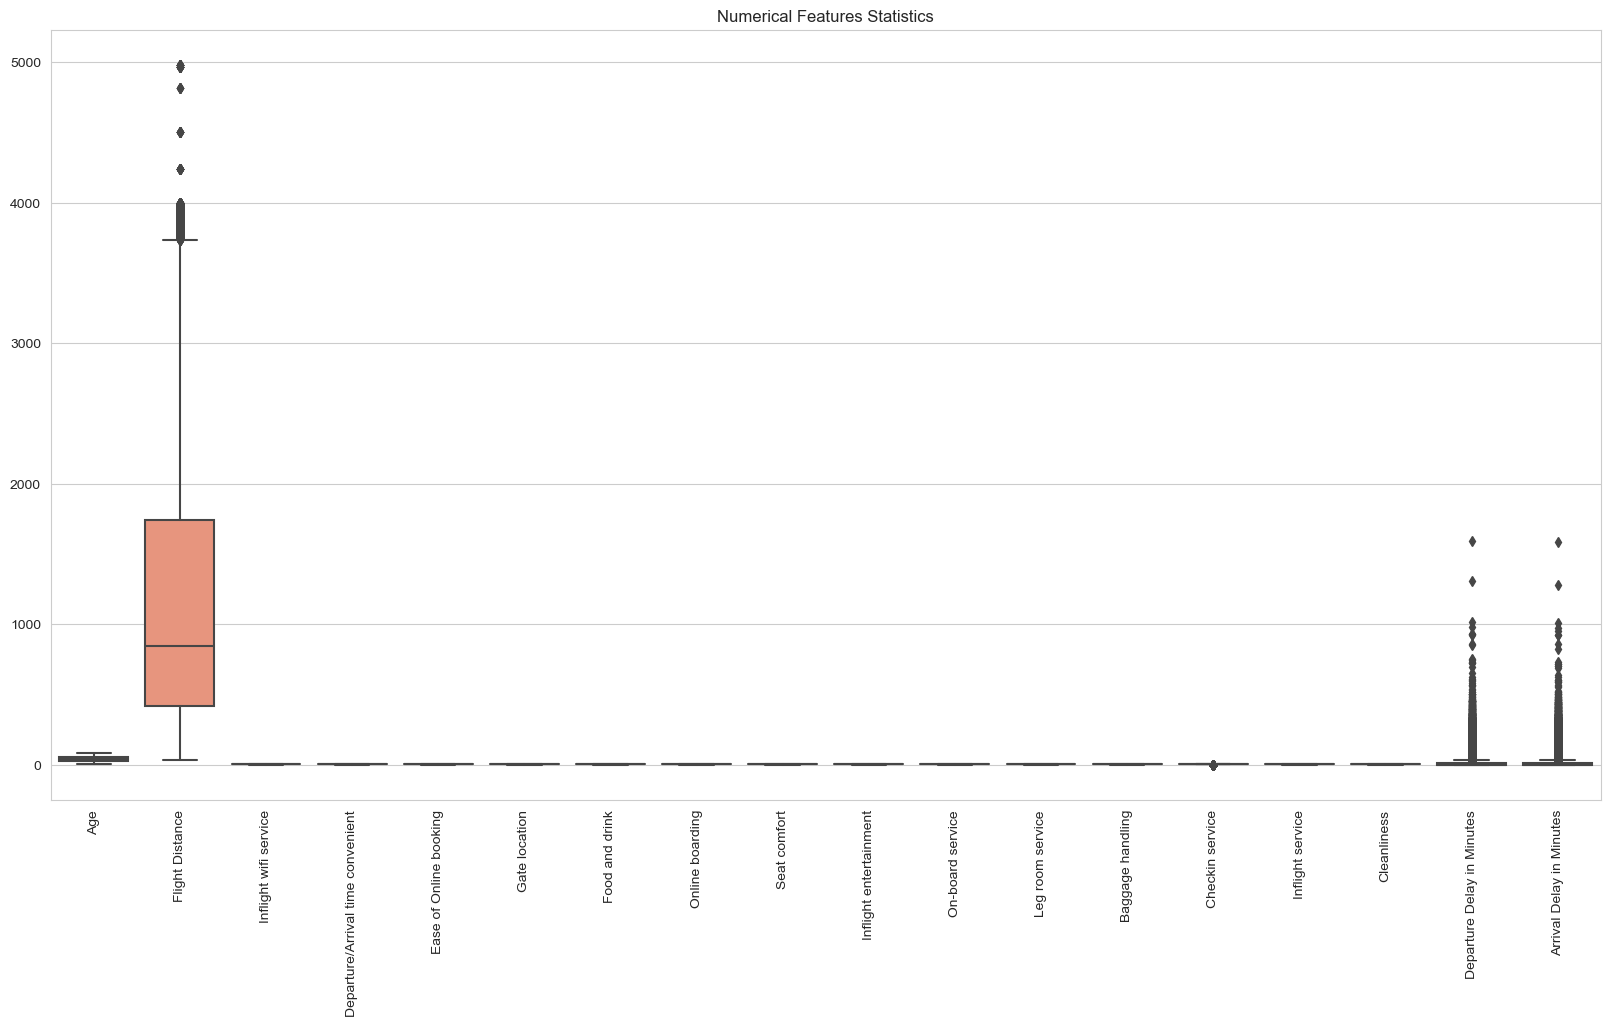

In [135]:
#Numerical Features Statistics



numerical_features = [
    'Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient',
    'Ease of Online booking','Gate location','Food and drink','Online boarding',
    'Seat comfort','Inflight entertainment','On-board service','Leg room service',
    'Baggage handling','Checkin service','Inflight service','Cleanliness','Departure Delay in Minutes',
    'Arrival Delay in Minutes'
]

plt.figure(figsize=(20, 10))
sns.boxplot(data=Airline_Data[numerical_features])
plt.xticks(rotation=90)
plt.title("Numerical Features Statistics")
plt.savefig('Numerical Features Statistics')
plt.show()




#Slide: Dataset Statistics Overview**

#Numerical Features:**
#Count:** 103904 (for all features)
#Mean Values:** 
  #Age: 39.38
  #Flight Distance: 1189.45 miles
  #Inflight wifi service: 2.73 (out of 5)
  #Departure Delay: 14.82 minutes
  #Arrival Delay: 15.18 minutes
#Key Percentiles (25%, 50%, 75%):**
  #Age: 27, 40, 51
  #Flight Distance: 414, 843, 1743 miles
  #(Include other significant features)

#Categorical Features:**
#Count:** 103904 (for all features)
#Top Categories:**
  # Gender: Female (52,727 occurrences)
  # Customer Type: Loyal Customer (84,923 occurrences)
  # Type of Travel: Business Travel (71,655 occurrences)
  # Class: Business (49,665 occurrences)
  # Satisfaction: Neutral or Dissatisfied (58,879 occurrences)



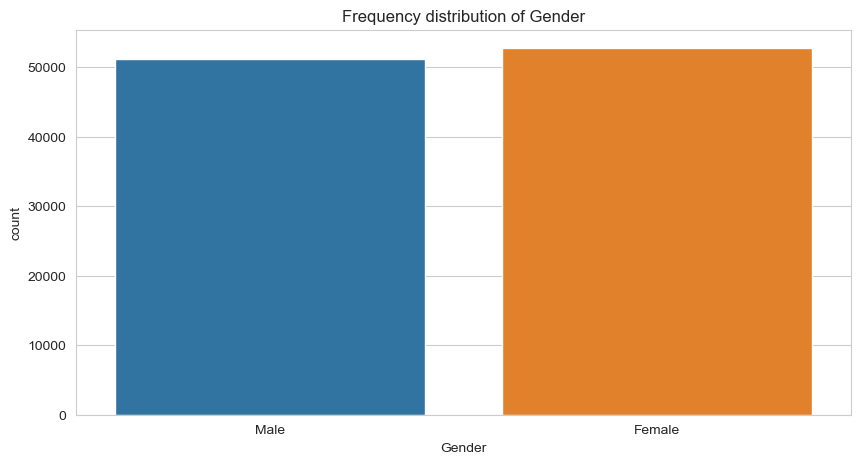

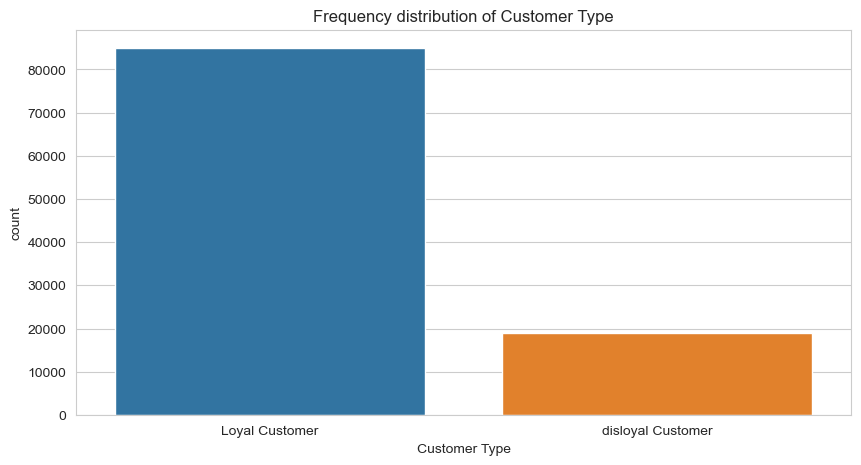

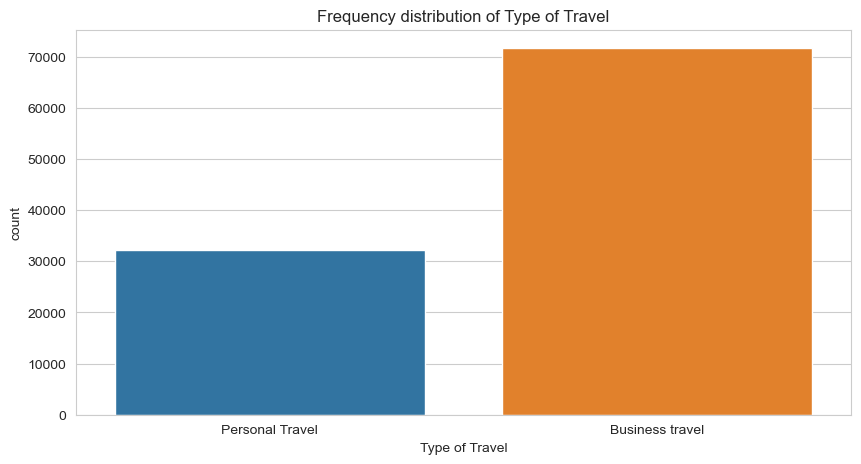

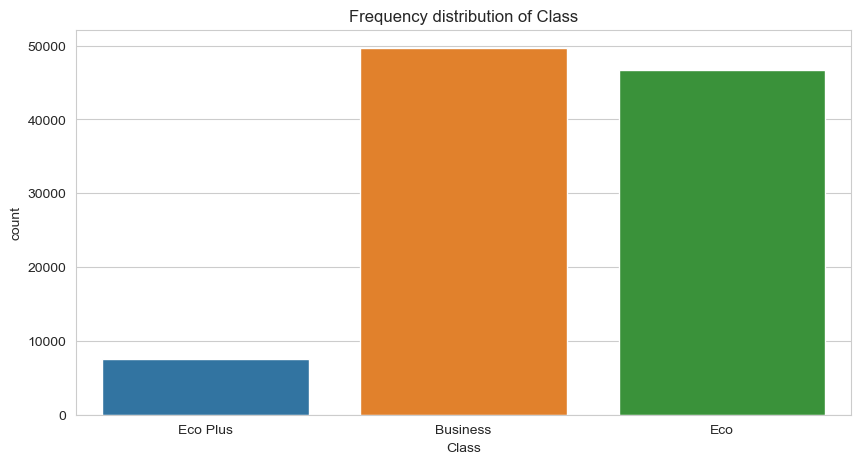

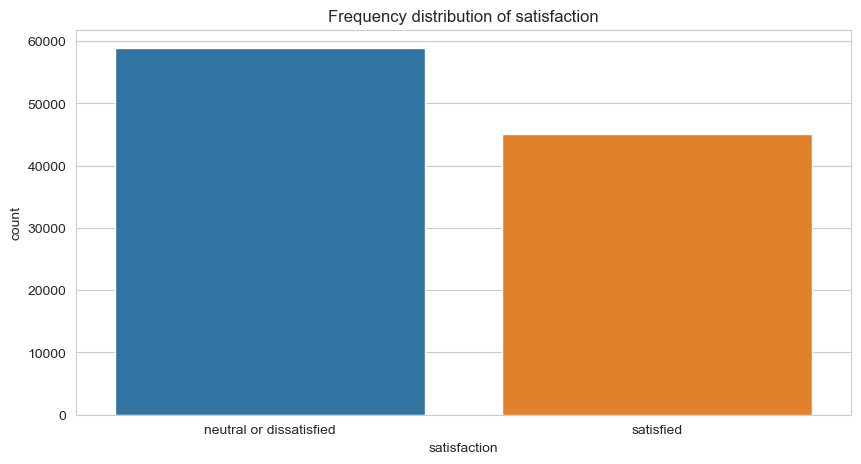

In [137]:
#Categorical Features Statistics
categorical_features = [
    'Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction'
]

for feature in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=Airline_Data, x=feature)
    plt.title(f"Frequency distribution of {feature}")
    plt.savefig('Frequency distribution of {feature}')
    plt.show()


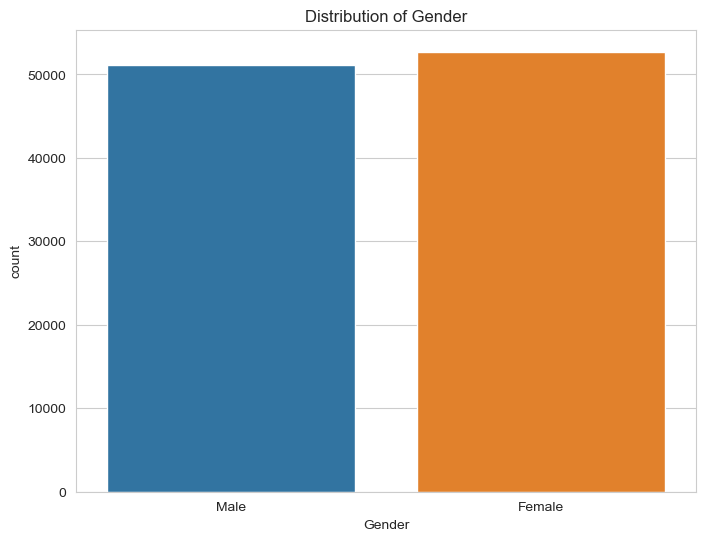

In [138]:
plt.figure(figsize=(8,6))
sns.countplot(data=Airline_Data, x='Gender')
plt.title('Distribution of Gender')
plt.savefig('gender_distribution.png')
plt.show()

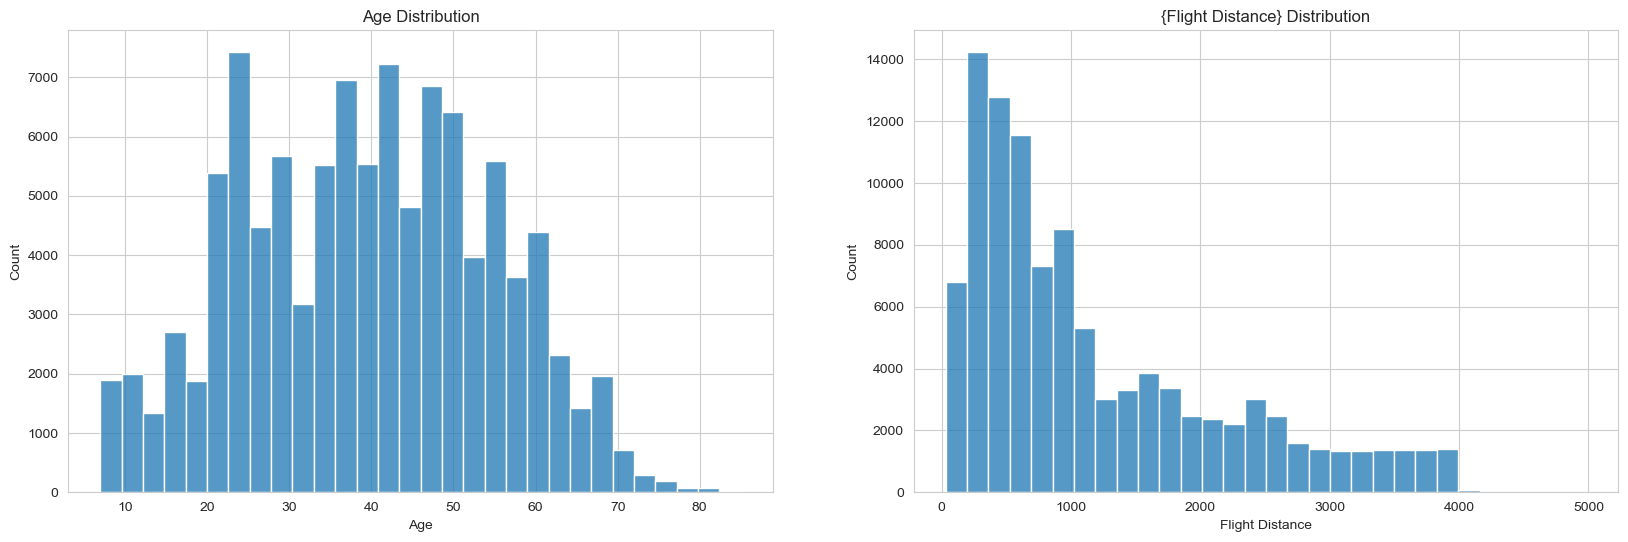

In [139]:
# Example: Plot distribution of "Age and Flight Distance"
#Age and Flight Distance:
#Histograms for continuous data.

fig, ax = plt.subplots(1, 2, figsize=(20, 6))

sns.histplot(Airline_Data['Age'], bins=30, ax=ax[0])
ax[0].set_title('Age Distribution')
sns.histplot(Airline_Data['Flight Distance'], bins=30, ax=ax[1])
ax[1].set_title('{Flight Distance} Distribution')

plt.show()

Index(['Unnamed: 0', 'Gender', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')
'Customer Type' column does not exist in the DataFrame.


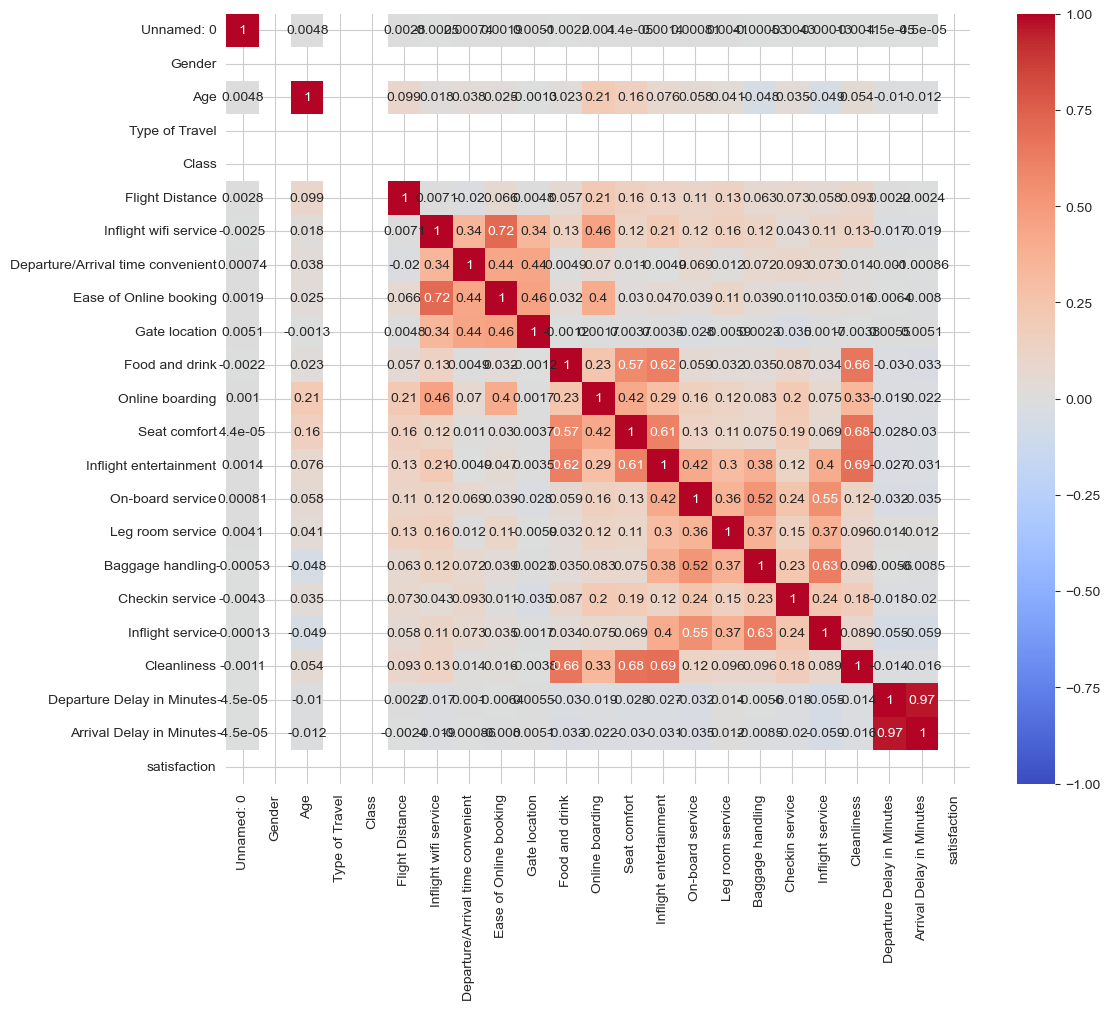

In [146]:
# Print columns
print(Airline_Data.columns)

# Check if 'Customer Type' exists in the DataFrame
if 'Customer Type' in Airline_Data.columns:
    Airline_Data['Customer Type'] = Airline_Data['Customer Type'].map({'Loyal Customer': 1, 'disloyal Customer': 0})
else:
    print("'Customer Type' column does not exist in the DataFrame.")

# Calculate the correlation matrix

# Remove Non-Numeric Columns
numeric_data = Airline_Data.select_dtypes(include=[np.number])
corr_matrix = numeric_data.corr()

# Convert Categorical Data to Numeric
Airline_Data['Gender'] = Airline_Data['Gender'].map({'Male': 1, 'Female': 0})
Airline_Data['Type of Travel'] = Airline_Data['Type of Travel'].map({'Business travel': 1, 'Personal Travel': 0})
Airline_Data['Class'] = Airline_Data['Class'].map({'Business': 1, 'Eco': 0})
Airline_Data['satisfaction'] = Airline_Data['Class'].map({'satisfied': 1, 'neutral or dissatisfied': 0})

# Drop columns with 'unnamed' and 'id number' in their names
columns_to_drop = [col for col in Airline_Data.columns if 'Unnamed' in col.lower() or 'id' in col.lower()]
Airline_Data = Airline_Data.drop(columns=columns_to_drop)

corr_matrix = Airline_Data.corr()

# Visualize the correlation matrix using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Save the heatmap as an image
plt.savefig("heatmap.png", dpi=300, bbox_inches='tight')

plt.show()
